In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Generate synthetic data

In [3]:
np.random.seed(42)
m = 50
X_single = 2 * np.random.rand(m)         # single feature
y = 4 + 3 * X_single + np.random.randn(m) * 0.5

# Build the design matrix for gradient descent: first column = 1s (intercept)
X = np.c_[np.ones(m), X_single]  # shape (m, 2)

# Problem 1(b)

In [4]:
# Loss function: Mean Squared Error (MSE)
def loss(X, y, theta):
    """
    Computes the MSE cost function for a univariate (or multivariate) linear regression in matrix form:
        J(theta) = (1 / m) * (X theta - y)^T (X theta - y)
    """
    m = len(y)
    residuals = X.dot(theta) - y  # shape: (m,)
    return (1 / m) * (residuals.T @ residuals)

# Gradient function
def gradient(X, y, theta):
    """
    Computes the gradient of the MSE cost function in matrix form:
        dJ/dtheta = (2 / m) * X^T (X theta - y)
    """
    m = len(y)
    residuals = X.dot(theta) - y  # shape: (m,)
    return (2 / m) * X.T.dot(residuals)

# Problem 2(a)

In [5]:
def gradient_descent(X, y, theta_init, alpha, maxsteps, precision):
    """
    Performs gradient descent on the MSE cost function without the 1/2 factor:
        J(theta) = (1 / m) * (X theta - y)^T (X theta - y),
    whose gradient is:
        dJ/dtheta = (2 / m) * X^T (X theta - y).

    Parameters
    ----------
    X : ndarray of shape (m, n)
        Design matrix (m = number of samples, n = number of features).
    y : ndarray of shape (m,)
        Target values.
    theta_init : ndarray of shape (n,)
        Initial parameter vector (guess).
    alpha : float
        Learning rate (step size).
    maxsteps : int
        Maximum number of iterations to run.
    precision : float
        Tolerance threshold for stopping based on the change in cost.

    Returns
    -------
    param_history : list of ndarray
        The parameter vector at each iteration.
    cost_history : list of float
        The cost function value at each iteration.
    preds_history : list of ndarray
        The predictions (X @ theta) at each iteration.
    """
    m = len(y)
    theta = theta_init.copy()

    param_history = []
    cost_history = []
    preds_history = []

    for step in range(maxsteps):
        # Compute current predictions and residuals
        predictions = X @ theta
        residuals = predictions - y
        
        # MSE cost without the 1/2 factor: (1/m)*||residuals||^2
        cost = (1 / m) * (residuals @ residuals)
        
        # Store current values
        param_history.append(theta.copy())
        cost_history.append(cost)
        preds_history.append(predictions.copy())
        
        # Gradient: (2/m)*X^T*(Xtheta - y)
        grad = (2 / m) * (X.T @ residuals)
        
        # Gradient descent step
        theta_new = theta - alpha * grad
        
        # Check stopping criterion based on cost change: We stop early if the difference in the cost function 
        # between two consecutive steps is smaller than precision, 
        # or once we’ve reached the maximum number of iterations maxsteps.

        if step > 0 and abs(cost_history[-1] - cost_history[-2]) < precision:
            break
        
        theta = theta_new

    return param_history, cost_history, preds_history


===== Gradient Descent Results =====
GD final estimate of parameters: [4.04616844 2.94617333]
GD final cost: 0.20576926904966292


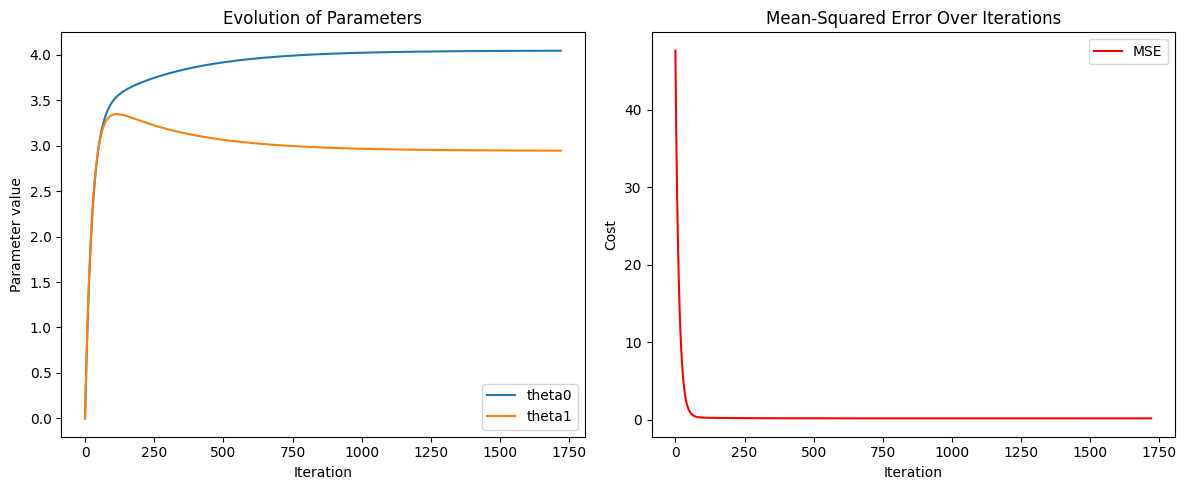

In [6]:
# 1. Set initial parameters and hyperparameters
theta_init = np.array([0.0, 0.0])   # theta0 = 0, theta1 = 0
alpha = 0.01
maxsteps = 2000
precision = 1e-8

# 2. Run gradient descent
param_history, cost_history, preds_history = gradient_descent(
    X, y, theta_init, alpha, maxsteps, precision
)

# 3. Print final estimate and cost
theta_gd = param_history[-1]
theta_cost = cost_history[-1]
print("===== Gradient Descent Results =====")
print("GD final estimate of parameters:", theta_gd)
print("GD final cost:", theta_cost)

# 4. Plot the evolution of parameters and the MSE
iterations = range(len(cost_history))

plt.figure(figsize=(12, 5))

# -- Left subplot: parameter evolution
plt.subplot(1, 2, 1)
plt.plot(iterations, [p[0] for p in param_history], label='theta0')
plt.plot(iterations, [p[1] for p in param_history], label='theta1')
plt.xlabel('Iteration')
plt.ylabel('Parameter value')
plt.title('Evolution of Parameters')
plt.legend()

# -- Right subplot: MSE over iterations
plt.subplot(1, 2, 2)
plt.plot(iterations, cost_history, 'r-', label='MSE')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Mean-Squared Error Over Iterations')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
# Compare with scikit-learn
#    We must use fit_intercept=False since X already has the intercept column
linreg = LinearRegression(fit_intercept=False)
linreg.fit(X, y)

theta_sklearn = linreg.coef_  # shape (2,)
print("===== Scikit-Learn Results =====")
print("Sklearn parameters:", theta_sklearn)

===== Scikit-Learn Results =====
Sklearn parameters: [4.04834464 2.9441415 ]


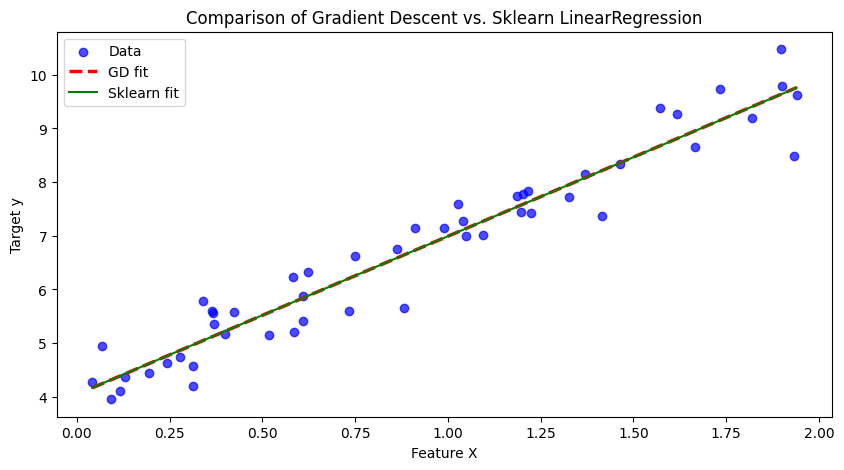

In [13]:
# Plot the data and both best-fitting lines 
plt.figure(figsize=(10, 5))

# Scatterplot of the data
plt.scatter(X_single, y, color='blue', alpha=0.7, label='Data')

# A range of x-values for plotting lines
x_line = np.linspace(X_single.min(), X_single.max(), 100)

# Our gradient descent line
y_line_gd = theta_gd[0] + theta_gd[1] * x_line
plt.plot(x_line, y_line_gd, 'r--', linewidth=2.5, label='GD fit')

# Sklearn line
y_line_sk = theta_sklearn[0] + theta_sklearn[1] * x_line
plt.plot(x_line, y_line_sk, 'g-', label='Sklearn fit')

plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.title('Comparison of Gradient Descent vs. Sklearn LinearRegression')
plt.legend()
plt.show()